In [4]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import scipy.stats as stats
from scipy.stats import linregress


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Store filepath in a variable
iou_utility = Path("Resources/iou_zipcodes_2020.csv")
non_iou_utility = Path("Resources/non_iou_zipcodes_2020.csv")
lat_long = Path("Resources/AGI+coords_data.csv")

In [6]:
# Read our data file with the Pandas library
iou_utility_df = pd.read_csv(iou_utility)
non_iou_utility_df = pd.read_csv(non_iou_utility)
lat_long_df = pd.read_csv(lat_long)

In [7]:
# Display iou data 
iou_utility_df.head()


,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.087890,0.000000,0.093887
1,36560,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
2,36513,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
3,36280,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
4,35473,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057


In [8]:
# Drop service type = delivery 

iou_new = iou_utility_df.loc[iou_utility_df["service_type"]=="Bundled"]

# Remove unnecessary columns 
iou_new.pop('eiaid')
iou_new.pop('comm_rate')
iou_new.pop('ind_rate')

# Rename zip column to match other csv file 

iou_new = iou_new.rename(columns = {'zip' :'ZIPCODE'})
iou_new.head()

,ZIPCODE,utility_name,state,service_type,ownership,res_rate
0,85321,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.093887
1,36560,Alabama Power Co,AL,Bundled,Investor Owned,0.135057
2,36513,Alabama Power Co,AL,Bundled,Investor Owned,0.135057
3,36280,Alabama Power Co,AL,Bundled,Investor Owned,0.135057
4,35473,Alabama Power Co,AL,Bundled,Investor Owned,0.135057


In [9]:
# Getting median values by grouping by zipcode
iou_new = iou_new.groupby(['ZIPCODE']).median()
iou_new.head()

,res_rate
ZIPCODE,
1002,0.240973
1005,0.240973
1007,0.240973
1009,0.240973
1010,0.240973


In [10]:
# Display non iou data 
non_iou_utility_df.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,39730,55,City of Aberdeen - (MS),MS,Bundled,Municipal,0.106873,0.043796,0.112400
1,38858,55,City of Aberdeen - (MS),MS,Bundled,Municipal,0.106873,0.043796,0.112400
2,21864,84,A & N Electric Coop,MD,Bundled,Cooperative,0.127542,0.000000,0.127045
3,21824,84,A & N Electric Coop,MD,Bundled,Cooperative,0.127542,0.000000,0.127045
4,21866,84,A & N Electric Coop,MD,Bundled,Cooperative,0.127542,0.000000,0.127045


In [11]:
# Drop service type = delivery 

non_iou_new = non_iou_utility_df.loc[non_iou_utility_df["service_type"]=="Bundled"]

# Remove unnecessary columns 
non_iou_new.pop('eiaid')
non_iou_new.pop('comm_rate')
non_iou_new.pop('ind_rate')

# Rename zip column to match other csv file 

non_iou_new = non_iou_new.rename(columns = {'zip' :'ZIPCODE'})
non_iou_new.head()

,ZIPCODE,utility_name,state,service_type,ownership,res_rate
0,39730,City of Aberdeen - (MS),MS,Bundled,Municipal,0.112400
1,38858,City of Aberdeen - (MS),MS,Bundled,Municipal,0.112400
2,21864,A & N Electric Coop,MD,Bundled,Cooperative,0.127045
3,21824,A & N Electric Coop,MD,Bundled,Cooperative,0.127045
4,21866,A & N Electric Coop,MD,Bundled,Cooperative,0.127045


In [12]:
# Getting median values by grouping by zipcode
non_iou_new = iou_new.groupby(['ZIPCODE']).median()
non_iou_new.head()

,res_rate
ZIPCODE,
1002,0.240973
1005,0.240973
1007,0.240973
1009,0.240973
1010,0.240973


In [13]:
# Display lat/long data

lat_long_df.head()

,Unnamed: 0,index,STATE,ZIPCODE,N2,A02650,Total Income per Individual,lng,lat
0,0,12873,MS,38738,140.0,577.0000,4.121429,-90.53653,33.93049
1,1,13576,MO,64147,280.0,1591.0000,5.682143,-94.54688,38.85387
2,2,22399,SD,57794,390.0,3206.0000,8.220513,-102.40695,43.12071
3,3,22477,TN,37140,390.0,3239.0001,8.305128,-87.65245,35.86345
4,4,14171,MT,59444,270.0,2321.0001,8.596297,-111.34881,48.65227


In [14]:
# Remove unnecessary columns 
lat_long_df.pop('index')
lat_long_df.pop('N2')
lat_long_df.pop('A02650')

lat_long_df.head()

,Unnamed: 0,STATE,ZIPCODE,Total Income per Individual,lng,lat
0,0,MS,38738,4.121429,-90.53653,33.93049
1,1,MO,64147,5.682143,-94.54688,38.85387
2,2,SD,57794,8.220513,-102.40695,43.12071
3,3,TN,37140,8.305128,-87.65245,35.86345
4,4,MT,59444,8.596297,-111.34881,48.65227


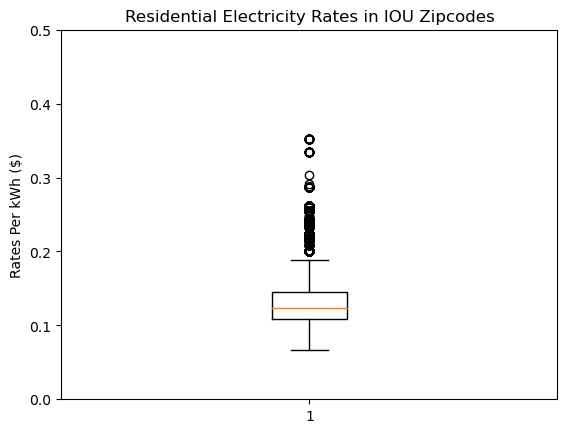

In [15]:
# Box plot for residential electricity rates in Invester-Owned Utilities 
res_rate = iou_new['res_rate']

fig1, ax1 = plt.subplots()
ax1.set_title('Residential Electricity Rates in IOU Zipcodes')
ax1.set_ylabel('Rates Per kWh ($)')
plt.ylim(0, 0.5)
ax1.boxplot(res_rate)
plt.show()

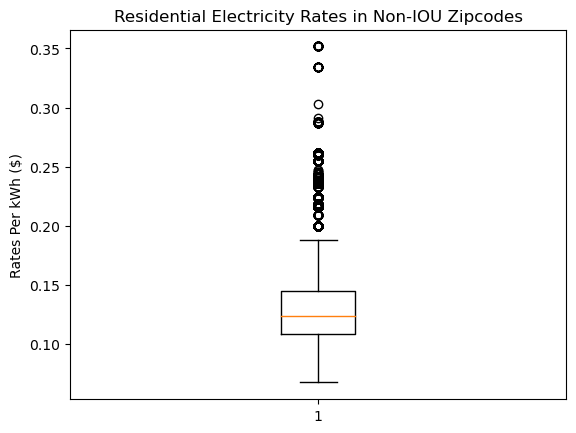

In [16]:
# Box plot for residential electricity rates in Non-Invester-Owned Utilities 
non_iou_res_rate = non_iou_new['res_rate']

fig2, ax2 = plt.subplots()
ax2.set_title('Residential Electricity Rates in Non-IOU Zipcodes')
ax2.set_ylabel('Rates Per kWh ($)')
ax2.boxplot(non_iou_res_rate)
plt.show()

In [17]:
# Merging with csv file that includes latitute and longitude 
iou_merged = iou_new.merge(lat_long_df, on="ZIPCODE", how='inner')
iou_merged.dropna(axis = 'index', how = 'any', inplace = True)
iou_merged.head()

,ZIPCODE,res_rate,Unnamed: 0,STATE,Total Income per Individual,lng,lat
0,1002,0.240973,25131,MA,60.517208,-72.46462,42.37633
1,1005,0.240973,18585,MA,36.737611,-72.10655,42.42117
2,1007,0.240973,22412,MA,44.968338,-72.40009,42.28163
3,1010,0.240973,22108,MA,44.043855,-72.20597,42.12904
4,1012,0.240973,19464,MA,38.033333,-72.84675,42.38495


In [18]:
# Merging with csv file that includes latitute and longitude 
non_iou_merged = non_iou_new.merge(lat_long_df, on="ZIPCODE", how='inner')
non_iou_merged.dropna(axis = 'index', how = 'any', inplace = True)
non_iou_merged.head()

,ZIPCODE,res_rate,Unnamed: 0,STATE,Total Income per Individual,lng,lat
0,1002,0.240973,25131,MA,60.517208,-72.46462,42.37633
1,1005,0.240973,18585,MA,36.737611,-72.10655,42.42117
2,1007,0.240973,22412,MA,44.968338,-72.40009,42.28163
3,1010,0.240973,22108,MA,44.043855,-72.20597,42.12904
4,1012,0.240973,19464,MA,38.033333,-72.84675,42.38495


In [19]:
# Merging iou utilities and non iou utilities for t-test 

total_merged = non_iou_merged.merge(iou_merged, on = "ZIPCODE", how = 'inner')

# Drop unnecessary columns
total_merged.pop('STATE_x')
total_merged.pop('STATE_y')
total_merged.pop('Total Income per Individual_x')
total_merged.pop('lng_x')
total_merged.pop('lat_x')
total_merged.pop('Unnamed: 0_x')
total_merged.pop('Unnamed: 0_y')


# Rename Columns 
total_merged = total_merged.rename(columns = {'res_rate_x':'non_iou_rate_per_kWh',
                                              'res_rate_y':'iou_rate_per_kWh',
                                              'Total Income per Individual_y':'Total Income per Individual',
                                              'lng_y':'lng',
                                              'lat_y':'lat'})
total_merged.head()

,ZIPCODE,non_iou_rate_per_kWh,iou_rate_per_kWh,Total Income per Individual,lng,lat
0,1002,0.240973,0.240973,60.517208,-72.46462,42.37633
1,1005,0.240973,0.240973,36.737611,-72.10655,42.42117
2,1007,0.240973,0.240973,44.968338,-72.40009,42.28163
3,1010,0.240973,0.240973,44.043855,-72.20597,42.12904
4,1012,0.240973,0.240973,38.033333,-72.84675,42.38495


In [20]:
# T-Test

stats.ttest_ind(total_merged.non_iou_rate_per_kWh, total_merged.iou_rate_per_kWh, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [21]:
energy_map1 = iou_merged.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "CartoLight",
    frame_width = 800,
    frame_height = 600,
    scale = 1,
    color = "res_rate",
    size = "Total Income per Individual",
    colorbar = True,
    xlabel="Longitude",
    ylabel="Latitude",
    title= "Income and Residential Electricity Rates for Investor-Owned Utilities"
)
energy_map1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (res_rate,Total Income per Individual)

In [22]:
energy_map2 = non_iou_merged.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "CartoLight",
    frame_width = 800,
    frame_height = 600,
    scale = 1,
    color = "res_rate",
    size = "Total Income per Individual",
    colorbar = True,
    xlabel="Longitude",
    ylabel="Latitude",
    title= "Income and Residential Electricity Rates for Non-Investor-Owned Utilities"
)
energy_map2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (res_rate,Total Income per Individual)

The r-squared is: 0.02953677911847818


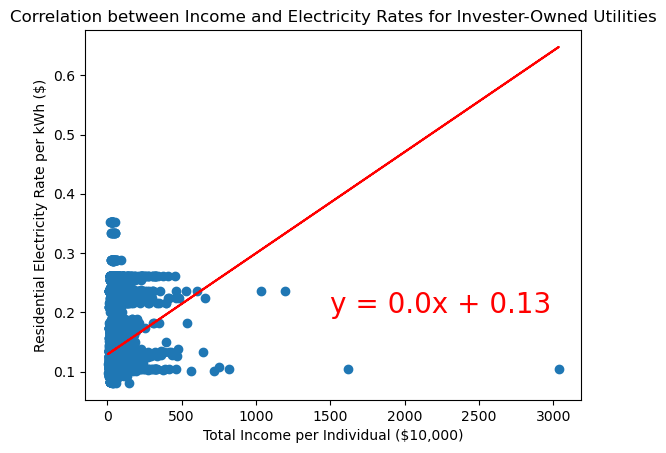

In [23]:
# Linear regression for Invester-Owned Utilities

x_values = iou_merged['Total Income per Individual']
y_values = iou_merged['res_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500,0.2),fontsize=20,color="red")
plt.xlabel('Total Income per Individual ($10,000)')
plt.ylabel('Residential Electricity Rate per kWh ($)')
plt.title('Correlation between Income and Electricity Rates for Invester-Owned Utilities')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02953677911847818


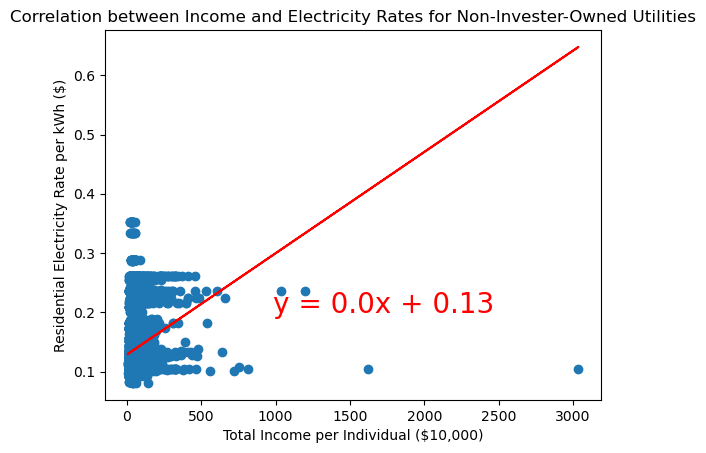

In [24]:
# Linear regression for Non-Invester-Owned Utilities

x_values = non_iou_merged['Total Income per Individual']
y_values = non_iou_merged['res_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(980,0.2),fontsize=20,color="red")
plt.xlabel('Total Income per Individual ($10,000)')
plt.ylabel('Residential Electricity Rate per kWh ($)')
plt.title('Correlation between Income and Electricity Rates for Non-Invester-Owned Utilities')
print(f"The r-squared is: {rvalue**2}")
plt.show()